In [529]:
import numpy as np
import scipy as sc
import math
import matplotlib as mpl
import matplotlib.pyplot as plt
from uncertainties import unumpy as unp
from uncertainties import ufloat, umath

from options import *
from constants import *

nom_vals = unp.nominal_values
std_devs = unp.std_devs

mpl.rcParams.update(rcParams)

In [530]:
# === Data import, low mean, 3ms dwell value
lowmean = np.loadtxt('../data/stat_lowmean3ms.TKA')

In [531]:
m = np.mean(lowmean)
print(f"Mean of the low mean distribution measure set: {m:.2f}")

Mean of the low mean distribution measure set: 3.81


<BarContainer object of 16 artists>

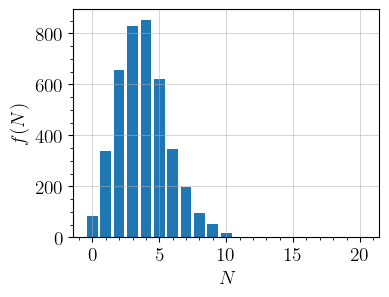

In [532]:
N, frequencies = np.unique_counts(lowmean)
# plt.scatter(N, frequencies)
plt.xlabel("$N$")
plt.ylabel("$f(N)$")
plt.bar(N, frequencies)
# plt.hist(lowmean, bins=range(len(values)+2), align='mid')

À NOTER QUE LA FONCTION CHISQUARE DE SCIPY FAIT TOUT ÇA EN UNE LIGNE MAIS BREF JE VEUX APPRENDRE

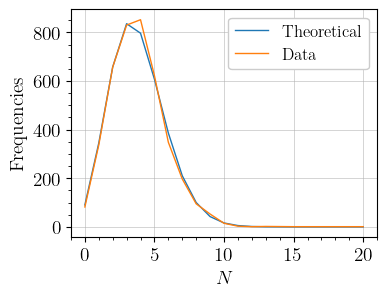

In [533]:
poisson = sc.stats.poisson(m)
poisson_probabilities = poisson.pmf(N) # the expected probability of detecting N particles (by null hypothesis)

sample_count = np.sum(frequencies)
expected_frequencies = sample_count * poisson_probabilities # the expected number of times N particles were detected (by null hypothesis)

plt.xlabel("$N$")
plt.ylabel("Frequencies")
plt.plot(N, expected_frequencies, label='Theoretical') # mettre en bar avec transparency ou à coté?
plt.plot(N, frequencies, label='Data')
plt.legend()

In [534]:
# ====== Pearson's chi-squared test, low mean distribution ======
# === Testing for Poisson ===
test_statistic = 0
# for i in range(np.size(frequencies)):
#     test_statistic += (frequencies[i] - expected_frequencies[i])**2 / expected_frequencies[i]
nfrequencies = frequencies[:-1]
nexpected_frequencies = expected_frequencies[:-1]
test_statistic = np.sum((nfrequencies - nexpected_frequencies)**2 / nexpected_frequencies)

print(f"Test statistic = {test_statistic:.2f}")

alpha = 0.025
dof =  np.size(N) - 1 - 1 # on enleve encore un parce que on a enlevé un datapoint
print(dof)
chi2 = sc.stats.chi2(dof)
alpha_statistic = chi2.isf(alpha)
print(f"Critical value pour alpha={alpha} is {alpha_statistic}")

pvalue = chi2.cdf(test_statistic)
print(f'p-value = {pvalue}')

pr = chi2.sf(test_statistic)
print(pr)

Test statistic = 44.13
14
Critical value pour alpha=0.025 is 26.118948045037367
p-value = 0.9999436120446741
5.638795532589507e-05


In [535]:
# now with scipy
S, p = sc.stats.chisquare(nfrequencies, nexpected_frequencies * np.mean(nfrequencies)/np.mean(nexpected_frequencies), dof)
# S, p = sc.stats.chisquare(frequencies, frequencies-1e-7, dof)

print(S)
print(p)

44.139958501501354
0.0


Test statistic = 49392.24
p-value = 0.0


/var/folders/s6/cl_qc4357kx9vckbb8vx6c740000gp/T/ipykernel_5498/65303451.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  gaussian_probabilities[i] = gauss.cdf(N[i+1]) - gauss.cdf([N[i]]) # the expected probability of detecting N particles (by null hypothesis)


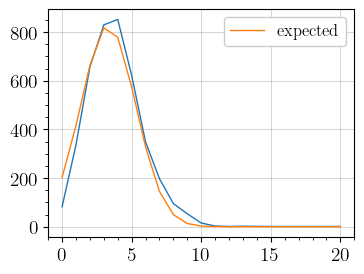

In [536]:
# ====== Pearson's chi-squared test, low mean distribution ======
# === Testing for Gaussian ===
gauss = sc.stats.norm(loc=m, scale=np.sqrt(m) ) # variance égale à la moyenne
gaussian_probabilities = np.zeros(np.size(N))
for i in range(np.size(N) - 1):
    gaussian_probabilities[i] = gauss.cdf(N[i+1]) - gauss.cdf([N[i]]) # the expected probability of detecting N particles (by null hypothesis)

sample_count = np.sum(frequencies)
expected_frequencies = sample_count * gaussian_probabilities # the expected number of times N particles were detected (by null hypothesis)
plt.plot(N, frequencies)
plt.plot(N, expected_frequencies, label='expected')
plt.legend()

test_statistic = np.sum((frequencies[:-1] - expected_frequencies[:-1])**2 / expected_frequencies[:-1])

print(f"Test statistic = {test_statistic:.2f}")

# alpha = 0.05
dof =  np.size(N) - 2 - 1 # on enleve encore un parce que on a enlevé un datapoint
chi2 = sc.stats.chi2(dof)
# alpha_statistic = chi2.ppf(1 - alpha)
# print(f"Critical value pour alpha={alpha} is {alpha_statistic}")

pvalue = chi2.sf(test_statistic)
print(f'p-value = {pvalue}')

In [537]:
highmean = np.loadtxt('../data/stat_highmean300ms.TKA')

In [538]:
gmean = np.mean(highmean)

(100.0, 300.0)

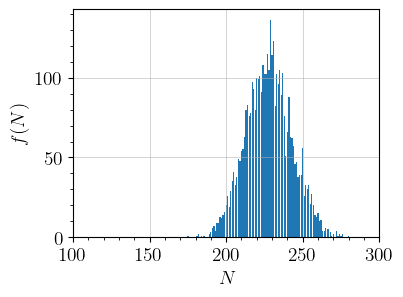

In [539]:
gN, gfrequencies = np.unique_counts(highmean)
# plt.scatter(values, counts, s=4)
plt.xlabel("$N$")
plt.ylabel("$f(N)$")
plt.bar(gN, gfrequencies)
plt.xlim(100, 300)

Test statistic = 104.19
p-value = 0.12946985822381082


/var/folders/s6/cl_qc4357kx9vckbb8vx6c740000gp/T/ipykernel_5498/2195986782.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  gaussian_probabilities[i] = gauss.cdf(gN[i+1]) - gauss.cdf([gN[i]]) # the expected probability of detecting gN particles (by null hypothesis)


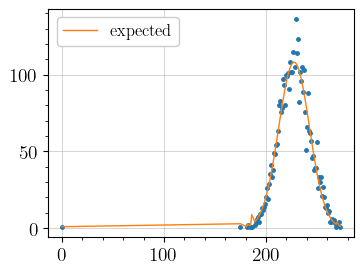

In [540]:
# ====== Pearson's chi-squared test, low high distribution ======
# === Testing for Gaussian ===
gauss = sc.stats.norm(loc=gmean, scale=np.sqrt(gmean) ) # variance égale à la moyenne
gaussian_probabilities = np.zeros(np.size(gN))
for i in range(np.size(gN) - 1):
    gaussian_probabilities[i] = gauss.cdf(gN[i+1]) - gauss.cdf([gN[i]]) # the expected probability of detecting gN particles (by null hypothesis)

sample_count = np.sum(gfrequencies)
expected_gfrequencies = sample_count * gaussian_probabilities # the expected number of times gN particles were detected (by null hypothesis)
rightlim=91
leftlim=0
plt.plot(gN[leftlim:rightlim], gfrequencies[leftlim:rightlim],
         ls='', marker='.', ms=5)
plt.plot(gN[leftlim:rightlim], expected_gfrequencies[leftlim:rightlim], label='expected')
plt.legend()

# print(np.size(gN))
# print(np.size(gN[leftlim:rightlim]))
test_statistic = np.sum((gfrequencies[leftlim:rightlim] - expected_gfrequencies[leftlim:rightlim])**2 / expected_gfrequencies[leftlim:rightlim])

print(f"Test statistic = {test_statistic:.2f}")

dof =  np.size(gN) - 2 - 5
chi2 = sc.stats.chi2(dof)

# alpha = 0.2
# critical_value = chi2.isf(alpha)
# print(f"Critical value pour alpha={alpha} is {critical_value}")

pvalue = chi2.sf(test_statistic)
print(f'p-value = {pvalue}')

In [541]:
# ====== Pearson's chi-squared test, high mean distribution ======
# === Testing for Poisson ===
poisson = sc.stats.poisson(gmean)
poisson_probabilities = poisson.pmf(gN) # the expected probability of detecting N particles (by null hypothesis)

sample_count = np.sum(gfrequencies)
expected_frequencies = sample_count * poisson_probabilities # the expected number of times N particles were detected (by null hypothesis)

nfrequencies = gfrequencies[leftlim:rightlim]
nexpected_frequencies = expected_gfrequencies[leftlim:rightlim]
test_statistic = np.sum((nfrequencies - nexpected_frequencies)**2 / nexpected_frequencies)

print(f"Test statistic = {test_statistic:.2f}")

alpha = 0.02
dof =  np.size(N)- 1 - 5
chi2 = sc.stats.chi2(dof)
alpha_statistic = chi2.isf(alpha)
print(f"Critical value pour alpha={alpha} is {alpha_statistic}")

pvalue = chi2.sf(test_statistic)
print(f'p-value = {pvalue}')

Test statistic = 104.19
Critical value pour alpha=0.02 is 21.16076754130469
p-value = 7.8750257015582e-18
